<a href="https://colab.research.google.com/github/Jay-5051/Data-Analysis/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mall = pd.read_csv(r"E:\PythonCore\SMVita\data\mall_customers.csv")

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
CustomerID                200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


In [ ]:
mall.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


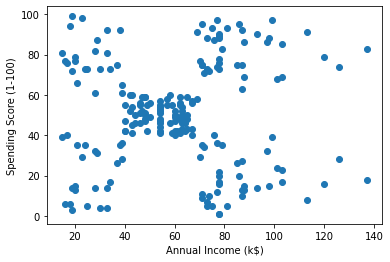

In [ ]:
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
mall.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [ ]:
IQR = 78-41.5
78 + 1.5*IQR

132.75

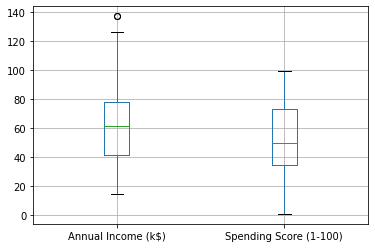

In [ ]:
mall.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)']);

### Outlier removal

In [ ]:
mall[mall['Annual Income (k$)']>132.75]

,CustomerID,Annual Income (k$),Spending Score (1-100)
198,199,137,18
199,200,137,83


In [ ]:
newmall = mall.iloc[:197,:]

In [ ]:
X = newmall.iloc[:,1:].values
print(X.shape)

(197, 2)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
k = np.arange(1, 11)
for cluster in k:
    model = KMeans(cluster, random_state=100)
    model.fit(X)
    wcss.append(model.inertia_)

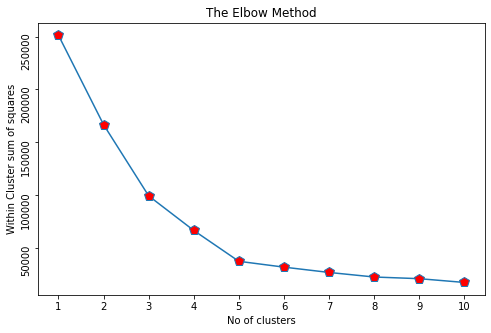

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k, wcss,marker='p', ms=10, mfc='r')
plt.xlabel("No of clusters")
plt.ylabel("Within Cluster sum of squares")
plt.xticks(k)
plt.yticks(rotation = 90)
plt.title("The Elbow Method")
plt.show()

In [ ]:
final_model = KMeans(n_clusters = 5)
final_model.fit(X)
row_clusters = final_model.predict(X)
# which cluster the row belongs to

In [ ]:
row_clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3])

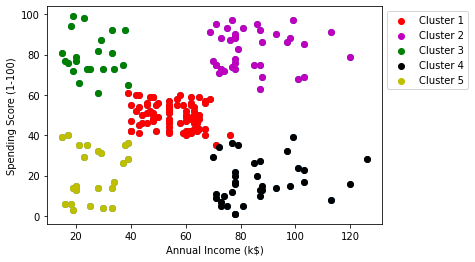

In [ ]:
plt.scatter(newmall.iloc[:,1], newmall.iloc[:,2])
plt.scatter(newmall.iloc[row_clusters == 0,1], 
            newmall.iloc[row_clusters == 0,2], 
            color='r', label='Cluster 1')
plt.scatter(newmall.iloc[row_clusters == 1,1], 
            newmall.iloc[row_clusters == 1,2], 
            color='m', label='Cluster 2')
plt.scatter(newmall.iloc[row_clusters == 2,1], 
            newmall.iloc[row_clusters == 2,2], 
            color='g', label='Cluster 3')
plt.scatter(newmall.iloc[row_clusters == 3,1], 
            newmall.iloc[row_clusters == 3,2], 
            color='k', label='Cluster 4')
plt.scatter(newmall.iloc[row_clusters == 4,1], 
            newmall.iloc[row_clusters == 4,2], 
            color='y', label='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()